In [28]:
#dependencies
#import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt

In [29]:
#csv files
car_prices_csv = "prices_clean.csv"

car_prices_df = pd.read_csv(car_prices_csv)
car_prices_df

,year,make,model,price
0,2023,Honda,Elevate,14530.00
1,2023,Honda,e,37140.00
2,2023,Honda,e Advance,37140.00
3,2023,Honda,Pilot Elite AWD,52030.00
4,2023,Honda,Pilot EX-L 8-Passenger AWD,42310.00
...,...,...,...,...
1165,2023,Tesla,S Performance,104990.00
1166,2023,Tesla,X Performance,120990.00
1167,2023,Tesla,Model 3 Long Range,51990.00
1168,2023,Tesla,Model X Plaid,119990.00


In [30]:
#find the average price of vehicle per manufactuer 
average_prices_per_make = car_prices_df.groupby("make")["price"].mean().reset_index()

#set float format without scientific notation
pd.options.display.float_format = '{:.2f}'.format

#change column name to average price
column_name_mapping = {
    "price": "average price"}
average_prices_per_make=average_prices_per_make.rename(columns=column_name_mapping)

#put in ascending order by price
average_prices_per_make= average_prices_per_make.sort_values(by="average price", ascending= True)

#average price per manufactuerer lowerst to highest
average_prices_per_make

,make,average price
17,Honda,29285.59
18,Hyundai,30005.43
27,MINI,31469.23
13,Fiat,32254.62
29,Mazda,33343.57
35,Subaru,34639.35
22,KIA,36406.61
7,Buick,36452.42
38,Volkswagen,39988.67
10,Chrysler,44824.81


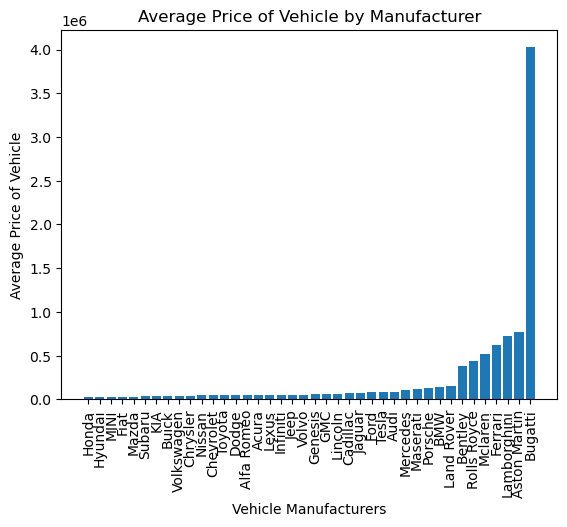

In [31]:
#bar graph of average prices by make of vehicle
categories= average_prices_per_make["make"]
values= average_prices_per_make["average price"]

plt.bar(categories, values)

plt.xlabel("Vehicle Manufacturers")
plt.ylabel("Average Price of Vehicle")
plt.title("Average Price of Vehicle by Manufacturer")

plt.xticks(rotation=90)

plt.show()

In [33]:
#5 cheapest manufactuerers
cheapest_vehicles = average_prices_per_make.sort_values(by="average price").head(5)
cheapest_vehicles

,make,average price
17,Honda,29285.59
18,Hyundai,30005.43
27,MINI,31469.23
13,Fiat,32254.62
29,Mazda,33343.57


In [35]:
#5 most expensive manufactuerers
expensive_vehicles = average_prices_per_make.sort_values(by="average price", ascending=False).head(5)
expensive_vehicles

,make,average price
6,Bugatti,4023333.33
2,Aston Martin,775809.44
23,Lamborghini,719892.60
12,Ferrari,620001.00
30,Mclaren,515548.75


In [39]:
#cheapest and most expensive models per make
#empty dictionaries to store prices
most_expensive_by_make = {}
least_expensive_by_make = {}

#loop through each make of vehicle
unique_makes = car_prices_df['make'].unique()
for make in unique_makes:
    
    make_data = car_prices_df[car_prices_df['make'] == make]
    #find most and lest expensive models per make
    most_expensive = make_data.loc[make_data['price'].idxmax()]
    least_expensive = make_data.loc[make_data['price'].idxmin()]
    
    #put respults in dictionary
    most_expensive_by_make[make]= most_expensive
    least_expensive_by_make[make]= least_expensive
    
print("Most Expensive Vehicles by Make:")
for make, vehicle in most_expensive_by_make.items():
    print(f"{make}: {vehicle['price']} - {vehicle['model']}")

print("\nLeast Expensive Vehicles by Make:")
for make, vehicle in least_expensive_by_make.items():
    print(f"{make}: {vehicle['price']} - {vehicle['model']}")
    

Most Expensive Vehicles by Make:
Honda: 52030.0 - Pilot Elite AWD
BMW: 750000.0 - 3.0 CSL Coupe
Lexus: 126290.0 - LC 500 Edge Limited Edition
Hyundai: 64960.0 - Ioniq 5 LR AWD 77kWh
Toyota: 536530.0 - Land Cruiser ZX Gasoline 3.5L
KIA: 63000.0 - EV6 Limited Edition
Nissan: 229000.0 - Z GT4
Audi: 225000.0 - R8 V10 GT RWD
Chevrolet: 114500.0 - Corvette Z06 2LZ Coupe
Ford: 1100000.0 - GT 68 Heritage Edition
Mercedes: 294070.0 - AMG GT
Porsche: 232000.0 - 911 Turbo S by Mansory
Infiniti: 87450.0 - QX80 Sensory AWD
Jaguar: 111200.0 - F-Type R Convertible
Cadillac: 152195.0 - Escalade-V ESV
Land Rover: 408680.0 - ge Rover 3.0 l Petrol HSE
Jeep: 98090.0 - Grand Wagoneer L Series II Obsidian
Volkswagen: 65000.0 - Multivan Edition
Maserati: 240000.0 - MC20 Cielo
Subaru: 51990.0 - Solterra Touring
Dodge: 96660.0 - Challenger SRT Demon 170
Mazda: 56950.0 - CX-90 Hybrid Premium Plus
Chrysler: 59990.0 - Pacifica Pinnacle Plug-in Hybrid
Aston Martin: 3600000.0 - Valkyrie
Ferrari: 2350000.0 - Daytona